# encore_21_titanic - 230221 try 3

## Dataset Description  
passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

## Import Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Global Variables (전역 변수)

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/Users/jaynam/workspace/playdata/encore21titanic/'

# get train and test dataset
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission
args.submission_csv = args.default_path+"submission.csv"
# set submission
args.submission_csv_230221_t3 = args.default_path+"submission_230221_t3.csv"

# 데이터 분석을 위한 변수들
args.random_state = 21

## Load Train and Test Dataset

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

print("org_train shape : ", org_train.shape)
print("org_test  shape : ", org_test.shape)

org_train shape :  (916, 12)
org_test  shape :  (393, 11)


## Check Dataset Info

### org_train info

In [4]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


### org_test info

In [5]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


In [6]:
org_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


### Heapmap

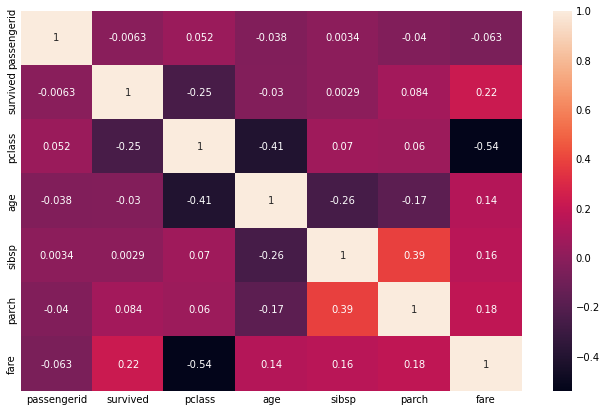

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(org_train.corr(),annot=True)
plt.show()

## Dataset Check

### gender -> Categorical Feature

In [8]:
org_train.groupby(['gender', 'survived'])['survived'].count()

gender  survived
female  0            54
        1           273
male    0           516
        1            73
Name: survived, dtype: int64

        survived
gender          
female  0.834862
male    0.123939


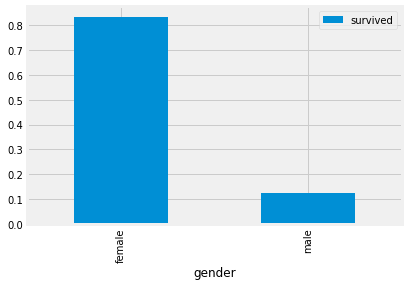

In [9]:
print(org_train[['gender','survived']].groupby(['gender']).mean())

org_train[['gender','survived']].groupby(['gender']).mean().plot.bar()
plt.show()

### Pclass -> Ordinal Feature

In [10]:
pd.crosstab(org_train['pclass'], 
            org_train['survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


3    495
1    227
2    194
Name: pclass, dtype: int64


<AxesSubplot:>

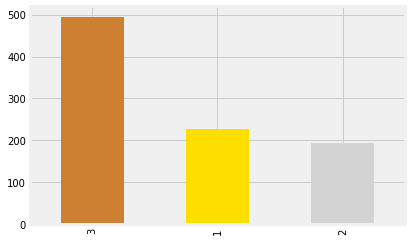

In [11]:
print(org_train['pclass'].value_counts())

org_train['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])

In [12]:
pd.crosstab([org_train['gender'], org_train['survived']], 
            org_train['pclass'],
            margins=True).style.background_gradient(cmap='summer_r')

### Age -> Continous Feature

In [13]:
print('Oldest Passenger was of:',org_train['age'].max(),'Years')
print('Youngest Passenger was of:',org_train['age'].min(),'Years')
print('Average Age on the ship:',org_train['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.69836956521739 Years


## Missing Value Check

In [14]:
org_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         1
dtype: int64

In [15]:
org_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
dtype: int64

## Filling NaN Value

##### Set fill df

In [16]:
fill_train = org_train
fill_test = org_test

In [17]:
fill_train['title'] = fill_train['name'].str.extract('([A-Za-z]+)\.')
fill_test['title'] = fill_train['name'].str.extract('([A-Za-z]+)\.')

In [18]:
fill_train['title'].replace( \
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True)
fill_test['title'].replace( \
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True)

In [19]:
fill_train.groupby('title')['age'].mean()

title
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

In [20]:
# fill_train
fill_train.loc[(fill_train.age.isnull())&(fill_train.title=='Master'),'age'] = 5
fill_train.loc[(fill_train.age.isnull())&(fill_train.title=='Miss'),'age'] = 22
fill_train.loc[(fill_train.age.isnull())&(fill_train.title=='Mr'),'age'] = 33
fill_train.loc[(fill_train.age.isnull())&(fill_train.title=='Mrs'),'age'] = 36
fill_train.loc[(fill_train.age.isnull())&(fill_train.title=='Other'),'age'] = 46

# fill_test
fill_test.loc[(fill_test.age.isnull())&(fill_test.title=='Master'),'age'] = 5
fill_test.loc[(fill_test.age.isnull())&(fill_test.title=='Miss'),'age'] = 22
fill_test.loc[(fill_test.age.isnull())&(fill_test.title=='Mr'),'age'] = 33
fill_test.loc[(fill_test.age.isnull())&(fill_test.title=='Mrs'),'age'] = 36
fill_test.loc[(fill_test.age.isnull())&(fill_test.title=='Other'),'age'] = 46

In [21]:
fill_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         1
title            0
dtype: int64

In [22]:
fill_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age              0
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
title            0
dtype: int64

In [23]:
# embarked
embarked_mode = fill_train['embarked'].mode().values[0]

fill_train['embarked'].fillna(embarked_mode, inplace=True)
fill_test['embarked'].fillna(embarked_mode, inplace=True)

In [24]:
fill_train.groupby('pclass').agg({"fare":"mean"})

,fare
pclass,
1,83.745613
2,20.388036
3,13.566363


In [25]:
fill_train.loc[(fill_train.fare.isnull())&(fill_train.pclass==1),'fare'] = 84.74
fill_train.loc[(fill_train.fare.isnull())&(fill_train.pclass==2),'fare'] = 20.38
fill_train.loc[(fill_train.fare.isnull())&(fill_train.pclass==3),'fare'] = 13.56

fill_test.loc[(fill_test.fare.isnull())&(fill_test.pclass==1),'fare'] = 84.74
fill_test.loc[(fill_test.fare.isnull())&(fill_test.pclass==2),'fare'] = 20.38
fill_test.loc[(fill_test.fare.isnull())&(fill_test.pclass==3),'fare'] = 13.56

In [26]:
fill_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         0
title            0
dtype: int64

In [27]:
fill_test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          296
embarked         0
title            0
dtype: int64

## Drop Columns

In [28]:
fill_train = fill_train.drop(['cabin'], axis =1)
fill_test = fill_test.drop(['cabin'], axis =1)

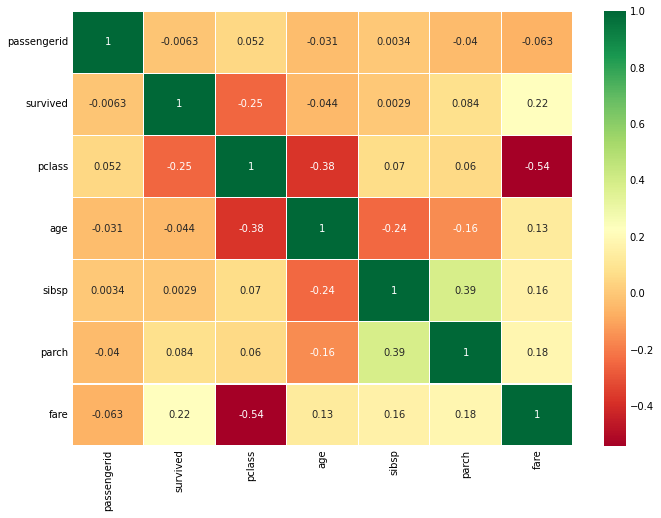

In [29]:
sns.heatmap(fill_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [30]:
age_range = [0, 5, 12, 18, 29, 49, 64, 100]
age_labels = ["bady", "child", "teenager", "adult", "middle", "senior", "super-elderly"]

fill_train['age_group'] = pd.cut(fill_train['age'], age_range, labels=age_labels)
fill_test['age_group'] = pd.cut(fill_test['age'], age_range, labels=age_labels)

In [31]:
age_mappings = {
    "bady" : 1, 
    "child" : 2,
    "teenager" : 3,
    "adult" : 4,
    "middle" : 5,
    "senior" : 6,
    "super-elderly" : 7
}

fill_train['age_group'] = fill_train['age_group'].map(age_mappings)
fill_test['age_group'] = fill_test['age_group'].map(age_mappings)

In [32]:
fill_train[fill_train['age_group'].isnull()]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,age_group


In [33]:
fill_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.8750,S,Mr,5
1,1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.7500,Q,Miss,4
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,Mrs,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,Mr,4
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,Mr,5


In [34]:
title_mappings = {
    "Master" : 1,
    "Miss" : 2,
    "Mr" : 3,
    "Mrs" : 4,
    "Other" : 5
}

fill_train['title'] = fill_train['title'].map(title_mappings)
fill_test['title'] = fill_test['title'].map(title_mappings)

In [35]:
fill_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,age_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.8750,S,3,5
1,1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.7500,Q,2,4
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S,4,6
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,3,4
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,3,5


In [36]:
gender_mapping = {
    'male': 0, 
    "female": 1
}

fill_train["gender"] = fill_train["gender"].map(gender_mapping)
fill_test["gender"] = fill_test["gender"].map(gender_mapping)

In [37]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3 }

fill_train["embarked"] = fill_train["embarked"].map(embarked_mapping)
fill_test["embarked"] = fill_test["embarked"].map(embarked_mapping)

In [38]:
fill_train['sub_age'] = fill_train['age'].map(lambda x: x//10)
fill_test['sub_age'] = fill_test['age'].map(lambda x: x//10)

In [39]:
fill_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,age_group,sub_age
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,33.0,0,0,SC/PARIS 2159,12.8750,1,3,5,3.0
1,1,0,3,"Henry, Miss. Delia",1,22.0,0,0,382649,7.7500,3,2,4,2.0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,1,4,6,5.0
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,1,3,4,2.0
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,1,3,5,4.0


In [40]:
fill_train['fare_range'] = pd.qcut(fill_train['fare'],4)
fill_test['fare_range'] = pd.qcut(fill_test['fare'],4)

In [41]:
fill_train.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.238095
"(7.896, 14.458]",0.275109
"(14.458, 30.018]",0.440529
"(30.018, 512.329]",0.558952


In [42]:
fare_splt = [0, 7.89, 14.45, 31, 513]

fill_train['fare_group'] = 0
fill_train.loc[(fare_splt[0]<fill_train['fare'])&(fill_train['fare']<fare_splt[1]), 'fare_group'] = 1
fill_train.loc[(fare_splt[1]<fill_train['fare'])&(fill_train['fare']<fare_splt[2]), 'fare_group'] = 2
fill_train.loc[(fare_splt[2]<fill_train['fare'])&(fill_train['fare']<fare_splt[3]), 'fare_group'] = 3
fill_train.loc[(fare_splt[3]<fill_train['fare'])&(fill_train['fare']<fare_splt[4]), 'fare_group'] = 4

fill_test['fare_group'] = 0
fill_test.loc[(fare_splt[0]<fill_test['fare'])&(fill_test['fare']<fare_splt[1]), 'fare_group'] = 1
fill_test.loc[(fare_splt[1]<fill_test['fare'])&(fill_test['fare']<fare_splt[2]), 'fare_group'] = 2
fill_test.loc[(fare_splt[2]<fill_test['fare'])&(fill_test['fare']<fare_splt[3]), 'fare_group'] = 3
fill_test.loc[(fare_splt[3]<fill_test['fare'])&(fill_test['fare']<fare_splt[4]), 'fare_group'] = 4

In [43]:
fill_train.head(5)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,title,age_group,sub_age,fare_range,fare_group
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,33.0,0,0,SC/PARIS 2159,12.8750,1,3,5,3.0,"(7.896, 14.458]",2
1,1,0,3,"Henry, Miss. Delia",1,22.0,0,0,382649,7.7500,3,2,4,2.0,"(-0.001, 7.896]",1
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,1,4,6,5.0,"(30.018, 512.329]",4
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,1,3,4,2.0,"(-0.001, 7.896]",1
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,1,3,5,4.0,"(14.458, 30.018]",3


In [44]:
fill_train['family_cnt'] = 0
fill_train['family_cnt'] = fill_train['sibsp'] + fill_train['parch'] + 1

fill_test['family_cnt'] = 0
fill_test['family_cnt'] = fill_test['sibsp'] + fill_test['parch'] + 1

In [45]:
fill_train.groupby("family_cnt")['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
family_cnt,
1,0.304659
2,0.539877
3,0.522936
4,0.653846
5,0.263158
6,0.157895
7,0.333333
8,0.166667
11,0.285714


In [46]:
df_groupby = fill_train.groupby("pclass").agg({"survived" : "mean"}).reset_index()
df_groupby.rename(columns = {'survived' : 'survived_by_pclass'}, inplace = True)
df_groupby

,pclass,survived_by_pclass
0,1,0.577093
1,2,0.391753
2,3,0.280808


In [47]:
print(f'before: {fill_train.shape}')

fill_train = pd.merge(fill_train, df_groupby, how="left", on="pclass") 
fill_test = pd.merge(fill_test, df_groupby, how="left", on="pclass") 

print(f'after: {fill_train.shape}')

before: (916, 17)
after: (916, 18)


### Final train and test Dataset

##### Setting Columns

In [48]:
train = fill_train.drop(['name', 'age', 'ticket', 'fare', 'fare_range'], axis=1)
test = fill_test.drop(['name', 'age', 'ticket', 'fare', 'fare_range'], axis=1)

In [49]:
train.head(5)

,passengerid,survived,pclass,gender,sibsp,parch,embarked,title,age_group,sub_age,fare_group,family_cnt,survived_by_pclass
0,0,0,2,0,0,0,1,3,5,3.0,2,1,0.391753
1,1,0,3,1,0,0,3,2,4,2.0,1,1,0.280808
2,2,1,1,1,1,1,1,4,6,5.0,4,3,0.577093
3,3,1,3,0,0,0,1,3,4,2.0,1,1,0.280808
4,4,0,2,0,1,0,1,3,5,4.0,3,2,0.391753


## Model

In [50]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'gender', 'sibsp', 'parch',
       'embarked', 'title', 'age_group', 'sub_age', 'fare_group', 'family_cnt',
       'survived_by_pclass'],
      dtype='object')

In [51]:
cols = ['pclass', 'gender', 'sibsp', 'parch', 'family_cnt', 'title', 'fare_group', 'age_group', 'survived_by_pclass']

X = train[cols]
y = train['survived'] # target

test = test[cols+['passengerid']]

X.shape, y.shape, test.shape

((916, 9), (916,), (393, 10))

In [52]:
test.set_index(['passengerid'], inplace=True)  

print(f'{test.shape}')
test.head()

(393, 9)


,pclass,gender,sibsp,parch,family_cnt,title,fare_group,age_group,survived_by_pclass
passengerid,,,,,,,,,
916,3,1,0,0,1,3,2,3,0.280808
917,2,1,0,0,1,2,2,5,0.391753
918,3,1,0,0,1,4,1,5,0.280808
919,3,0,0,0,1,3,1,5,0.280808
920,1,1,1,1,3,3,4,5,0.577093


In [53]:
X.shape, y.shape, test.shape

((916, 9), (916,), (393, 9))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = train['survived'],
    random_state = args.random_state
)

In [55]:
X_train.shape, X_test.shape, test.shape

((732, 9), (184, 9), (393, 9))

In [56]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0, 0)

### Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscaler.fit(X_train)

X_train_scaled = stdscaler.fit_transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

### Decision Tree

##### Not Scaler

In [58]:
from sklearn.tree import DecisionTreeClassifier

deicisiontree = DecisionTreeClassifier(random_state=args.random_state)
deicisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [59]:
deicisiontree.score(X_train,y_train) , deicisiontree.score(X_test,y_test)

(0.9139344262295082, 0.8152173913043478)

##### Apply Standard Scaler

In [60]:
deicisiontree_scaled = DecisionTreeClassifier(random_state=args.random_state)
deicisiontree_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=21)

In [61]:
deicisiontree_scaled.score(X_train_scaled,y_train) , deicisiontree_scaled.score(X_test_scaled,y_test)

(0.9139344262295082, 0.8152173913043478)

In [62]:
from sklearn.metrics import roc_curve, auc 

pred = deicisiontree.predict_proba(X_test)[:, 1]
scaled_pred = deicisiontree_scaled.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

decisiontree_auc = auc(fpr, tpr)
scaled_decisiontree_auc = auc(fpr_s, tpr_s)

decisiontree_auc, scaled_decisiontree_auc

(0.8027568922305764, 0.806265664160401)

### Random Forest

##### Not Scaler

In [63]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=args.random_state)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [64]:
randomforest.score(X_train,y_train), randomforest.score(X_test,y_test)

(0.9139344262295082, 0.8260869565217391)

##### Apply Standard Scaler

In [65]:
from sklearn.ensemble import RandomForestClassifier

randomforest_scaled = RandomForestClassifier(random_state=args.random_state)
randomforest_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=21)

In [66]:
randomforest_scaled.score(X_train_scaled,y_train), randomforest_scaled.score(X_test_scaled,y_test)

(0.9139344262295082, 0.8260869565217391)

##### Robust Scaler

In [67]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

robust_randomforest = RandomForestClassifier(random_state=args.random_state)
robust_randomforest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=21)

In [68]:
robust_randomforest.score(X_train_scaled,y_train), robust_randomforest.score(X_test_scaled,y_test)

(0.9139344262295082, 0.8260869565217391)

##### PowerTransfomer

In [69]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer()
ptf.fit(X_train)
X_train_scaled = ptf.transform(X_train)
X_test_scaled = ptf.transform(X_test)

ptf_randomforest = RandomForestClassifier(random_state=args.random_state)
ptf_randomforest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=21)

In [70]:
ptf_randomforest.score(X_train_scaled,y_train), ptf_randomforest.score(X_test_scaled,y_test)

(0.9139344262295082, 0.8260869565217391)

In [71]:
from sklearn.metrics import roc_curve, auc 

pred = randomforest.predict_proba(X_test)[:, 1]
scaled_pred = randomforest_scaled.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)
fpr_s, tpr_s, _ = roc_curve(y_test, scaled_pred)

randomforest_auc = auc(fpr, tpr)
scaled_randomforest_auc = auc(fpr_s, tpr_s)

randomforest_auc, scaled_randomforest_auc

(0.8505639097744362, 0.8666040100250627)

### Gradient Boosting Classifier

##### Not Scaler

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier(random_state=args.random_state)
gradientboosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=21)

In [73]:
gradientboosting.score(X_train,y_train) , gradientboosting.score(X_test,y_test)

(0.889344262295082, 0.8478260869565217)

##### Standrard Scaler

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting_scaled = GradientBoostingClassifier(random_state=args.random_state)
gradientboosting_scaled.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=21)

In [75]:
gradientboosting_scaled.score(X_train_scaled,y_train), gradientboosting_scaled.score(X_test_scaled,y_test)

(0.889344262295082, 0.8478260869565217)

In [76]:
from sklearn.metrics import roc_curve, auc 

pred = gradientboosting.predict_proba(X_test)[:, 1]
pred_scaled = gradientboosting.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)
fpr_s, tpr_s, _ = roc_curve(y_test, pred_scaled)

gradientboosting_auc = auc(fpr, tpr)
scaled_gradientboosting_auc = auc(fpr_s, tpr_s)

gradientboosting_auc, scaled_gradientboosting_auc

(0.8594611528822056, 0.8630952380952381)

### Logisitic Regression

##### Not Scaler

In [96]:
from sklearn.linear_model import LogisticRegression

logregression = LogisticRegression(random_state=args.random_state)
logregression.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [97]:
logregression.score(X_train,y_train) , logregression.score(X_test,y_test)

(0.860655737704918, 0.8586956521739131)

### Submission try 3

In [98]:
test_pred = logregression.predict_proba(test)[:, 1]
test_pred.shape

(393,)

In [99]:
submission = pd.read_csv(args.submission_csv)
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.803381
1,917,0.885300
2,918,0.696801
3,919,0.060137
4,920,0.923296


In [100]:
submission.to_csv(args.submission_csv_230221_t3, header=True, index=False)

##### Standard Scaler

In [79]:
from sklearn.linear_model import LogisticRegression

logregression_scaled = LogisticRegression(random_state=args.random_state)
logregression_scaled.fit(X_train_scaled, y_train)

LogisticRegression(random_state=21)

In [80]:
logregression_scaled.score(X_train_scaled,y_train) , logregression_scaled.score(X_test_scaled,y_test)

(0.860655737704918, 0.8641304347826086)

In [81]:
from sklearn.metrics import roc_curve, auc 

pred = logregression.predict_proba(X_test)[:, 1]
pred_scaled = logregression_scaled.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)
fpr_s, tpr_s, _ = roc_curve(y_test, pred_scaled)

logregression_auc = auc(fpr, tpr)
scaled_logregression_auc = auc(fpr_s, tpr_s)

logregression_auc, scaled_logregression_auc

(0.8893483709273182, 0.8734335839598998)

### Linear Support Vector Machines

In [82]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

LinearSVC()

In [83]:
from sklearn.metrics import accuracy_score

pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(pred, y_test)
acc_linear_svc

0.8641304347826086

### Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [85]:
from sklearn.metrics import roc_curve, auc 

pred = gaussian.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)
gaussian_auc = auc(fpr, tpr)
gaussian_auc

0.8590225563909775

In [86]:
test_pred = gaussian.predict_proba(test)[:, 1]
test_pred.shape

(393,)

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8674863387978142, 0.8260869565217391)

In [89]:
from sklearn.metrics import roc_curve, auc 

pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)
knn_auc = auc(fpr, tpr)
knn_auc

0.8479949874686716

### All Model auc Result

In [90]:
print("decisiontree_auc  = ", decisiontree_auc)
print("randomforest_auc = ", randomforest_auc)
print("gradientboosting_auc = ", gradientboosting_auc)
print("logregression_auc = ", logregression_auc)
print("acc_linear_svc = ", acc_linear_svc)
print("gaussian_auc = ", gaussian_auc)
print("knn_auc = ", knn_auc)

decisiontree_auc  =  0.8027568922305764
randomforest_auc =  0.8505639097744362
gradientboosting_auc =  0.8594611528822056
logregression_auc =  0.8893483709273182
acc_linear_svc =  0.8641304347826086
gaussian_auc =  0.8590225563909775
knn_auc =  0.8479949874686716


In [91]:
# submission = pd.read_csv(args.submission_csv)
# print(f'{submission.shape}')
# submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [92]:
# submission['survived'] = test_pred
# submission.head()

,passengerid,survived
0,916,0.895211
1,917,0.975459
2,918,0.922261
3,919,0.007509
4,920,0.998622


In [93]:
# submission.to_csv(args.submission_csv_230221_t3, header=True, index=False)

##### 1) cols = ['pclass', 'gender', 'family_cnt']
decisiontree_auc  =  0.8595238095238096  
randomforest_auc =  0.8613408521303259  
gradientboosting_auc =  0.8582080200501254  
logregression_auc =  0.867857142857143  
acc_linear_svc =  0.8695652173913043  
gaussian_auc =  0.8635964912280703  

##### 2) cols = ['pclass', 'gender', 'family_cnt', 'title']
decisiontree_auc  =  0.8690476190476191  
randomforest_auc =  0.8733709273182957  
gradientboosting_auc =  0.8654761904761905  
logregression_auc =  0.8802631578947367  
acc_linear_svc =  0.8695652173913043  
gaussian_auc =  0.8661027568922306  

##### 3) cols = ['pclass', 'gender', 'family_cnt', 'title', 'fare_group']  
decisiontree_auc  =  0.8650375939849625  
randomforest_auc =  0.8765037593984962  
gradientboosting_auc =  0.8704887218045114  
logregression_auc =  0.880701754385965  
acc_linear_svc =  0.8695652173913043  
gaussian_auc =  0.8738095238095238  

##### *** 4) cols = ['pclass', 'gender', 'family_cnt', 'title', 'fare_group', 'age_group'] 
연령별 그룹을 추가하니까 정확도가 오름  

decisiontree_auc  =  0.8217418546365916  
randomforest_auc =  0.8543859649122808  
gradientboosting_auc =  0.8584586466165414  
logregression_auc =  0.8873433583959899  과소적합 발생  
acc_linear_svc =  0.8695652173913043  
gaussian_auc =  0.8780701754385966  

##### 5) cols = ['pclass', 'gender', 'family_cnt', 'title', 'fare_group', 'age_group', 'sub_age']
sub_age 를 추가했더니 떨어짐.  
따라서, 나이대 구분은 관계가 적다는 것을 확인  

decisiontree_auc  =  0.8108395989974937  
randomforest_auc =  0.8608395989974937  
gradientboosting_auc =  0.855639097744361  
logregression_auc =  0.8795112781954887  
acc_linear_svc =  0.8695652173913043  
gaussian_auc =  0.8771303258145364  

##### 6) cols = ['pclass', 'gender', 'family_cnt', 'title', 'fare_group', 'age_group', 'survived_by_pclass']

정확도가 살짝 떨어짐

decisiontree_auc  =  0.8107769423558898  
randomforest_auc =  0.8504385964912281  
gradientboosting_auc =  0.8584586466165414  
logregression_auc =  0.8873433583959899  
acc_linear_svc =  0.8641304347826086  
gaussian_auc =  0.8754385964912281  

##### 7) cols = ['pclass', 'gender', 'sibsp', 'parch', 'family_cnt', 'title', 'fare_group', 'age_group', 'survived_by_pclass']

decisiontree_auc  =  0.8027568922305764  
randomforest_auc =  0.8505639097744362  
gradientboosting_auc =  0.8594611528822056  
logregression_auc =  0.8893483709273182  
acc_linear_svc =  0.8641304347826086  
gaussian_auc =  0.8590225563909775  
knn_auc =  0.8479949874686716  